In [10]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.callbacks import ModelCheckpoint

In [11]:
(train_features, train_label), (test_features, test_label) = mnist.load_data()  

print "number of training images= ",train_features.shape[0]
print "dimensions of training images= ",(train_features.shape[1],train_features.shape[2])
print "number of testing images= ",test_features.shape[0]
print "number of labels= ",len(np.unique(train_label))

number of training images=  60000
dimensions of training images=  (28, 28)
number of testing images=  10000
number of labels=  10


## visualising data

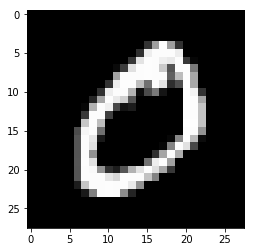

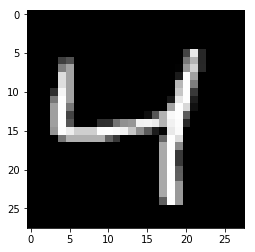

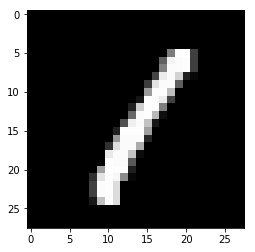

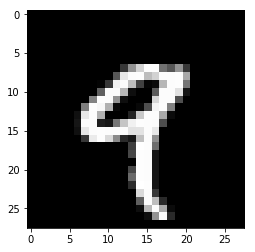

In [12]:
plt.figure(0)  
li=[1,2,3,4]
for ix in li:
 plt.imshow(train_features[ix,:,:],cmap='gray') #display the ix row
 plt.show()

In [13]:
#pre-processing:
# scaling from [0-255] to [0-1]
train_features=train_features.astype('float32')/255.0 
test_features=test_features.astype('float32')/255.0   
#transformng vector into binary encoding
train_labels = np_utils.to_categorical(train_label, 10)  
test_labels = np_utils.to_categorical(test_label, 10)
# preparing input for neural net
train_features = train_features.reshape(train_features.shape[0],28, 28,1).astype('float32')
test_features = test_features.reshape(test_features.shape[0],28, 28,1).astype('float32')

print test_label[1],' becomes ',test_labels[1],'due to binary encoding'

2  becomes  [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.] due to binary encoding


In [14]:
model=Sequential()
model.add(Convolution2D(filters=32,kernel_size=2,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Convolution2D(filters=32,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Convolution2D(filters=64,kernel_size=2,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        4128      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 64)          8256      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 3, 3, 64)          0         
__________

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


In [16]:
checkpointer=ModelCheckpoint(filepath='best_weights.hdf5',verbose=1,save_best_only=True)
hist=model.fit(train_features,train_labels,batch_size=200,epochs=10,validation_split=0.2,callbacks=[checkpointer],verbose=1,shuffle=True)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 30s - loss: 0.4583 - acc: 0.8514 - val_loss: 0.1187 - val_acc: 0.9638
Epoch 2/10
48000/48000 [==============================] - 29s - loss: 0.1426 - acc: 0.9547 - val_loss: 0.0728 - val_acc: 0.9774
Epoch 3/10
48000/48000 [==============================] - 30s - loss: 0.1018 - acc: 0.9679 - val_loss: 0.0522 - val_acc: 0.9846
Epoch 4/10
48000/48000 [==============================] - 29s - loss: 0.0804 - acc: 0.9740 - val_loss: 0.0571 - val_acc: 0.9825
Epoch 5/10
48000/48000 [==============================] - 29s - loss: 0.0687 - acc: 0.9781 - val_loss: 0.0409 - val_acc: 0.9868
Epoch 6/10
48000/48000 [==============================] - 28s - loss: 0.0588 - acc: 0.9810 - val_loss: 0.0386 - val_acc: 0.9883
Epoch 7/10
48000/48000 [==============================] - 29s - loss: 0.0537 - acc: 0.9834 - val_loss: 0.0347 - val_acc: 0.9893
Epoch 8/10
48000/48000 [==============================

In [17]:
model.load_weights('best_weights.hdf5')

In [18]:
score=model.evaluate(test_features,test_labels,verbose=0)


In [21]:
print 'the accuracy for the model is ',score[1]*100

the accuracy for the model is  99.09
